In [3]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import h5py

import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
sys.path.append(os.environ['DH_DIR'])

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
from matplotlib.ticker import FixedLocator, FixedFormatter
mpl.rc_file(f"matplotlibrc")

In [2]:
data_dir = os.environ['DM21CM_DATA_DIR'] + "/tf/zf01/data"

In [7]:
os.listdir(data_dir)

['elec_dep.h5',
 'elec_scat.h5',
 'phot_dep.h5',
 'abscissas.h5',
 'sfrd_tables.h5',
 'phot_scat.h5',
 'phot_prop.h5']

In [9]:
with h5py.File(f"{data_dir}/sfrd_tables.h5", "r") as hf:
    ps_table = hf['cond_sfrd_table'][()]
    st_table = hf['st_sfrd_table'][()]
    delta_range = hf['delta_range'][()]
    z_range = hf['z_range'][()]
    r_range = hf['r_range'][()]

In [12]:
print(ps_table.shape,  z_range.shape, delta_range.shape, r_range.shape)

(128, 127, 126) (128,) (127,) (126,)


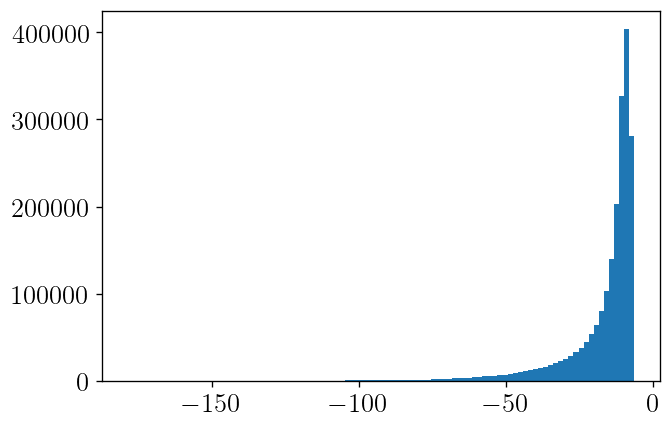

In [19]:
plt.hist(np.log10(ps_table).flatten(), bins=100);

In [21]:
from astropy.cosmology import Planck18 as cosmo
from astropy import units
rhoCrit0 = cosmo.critical_density(0).to(units.M_sun / units.Mpc**3).value

def RtoM(R):
    return 4*np.pi*cosmo.Om0*rhoCrit0*R**3 / 3

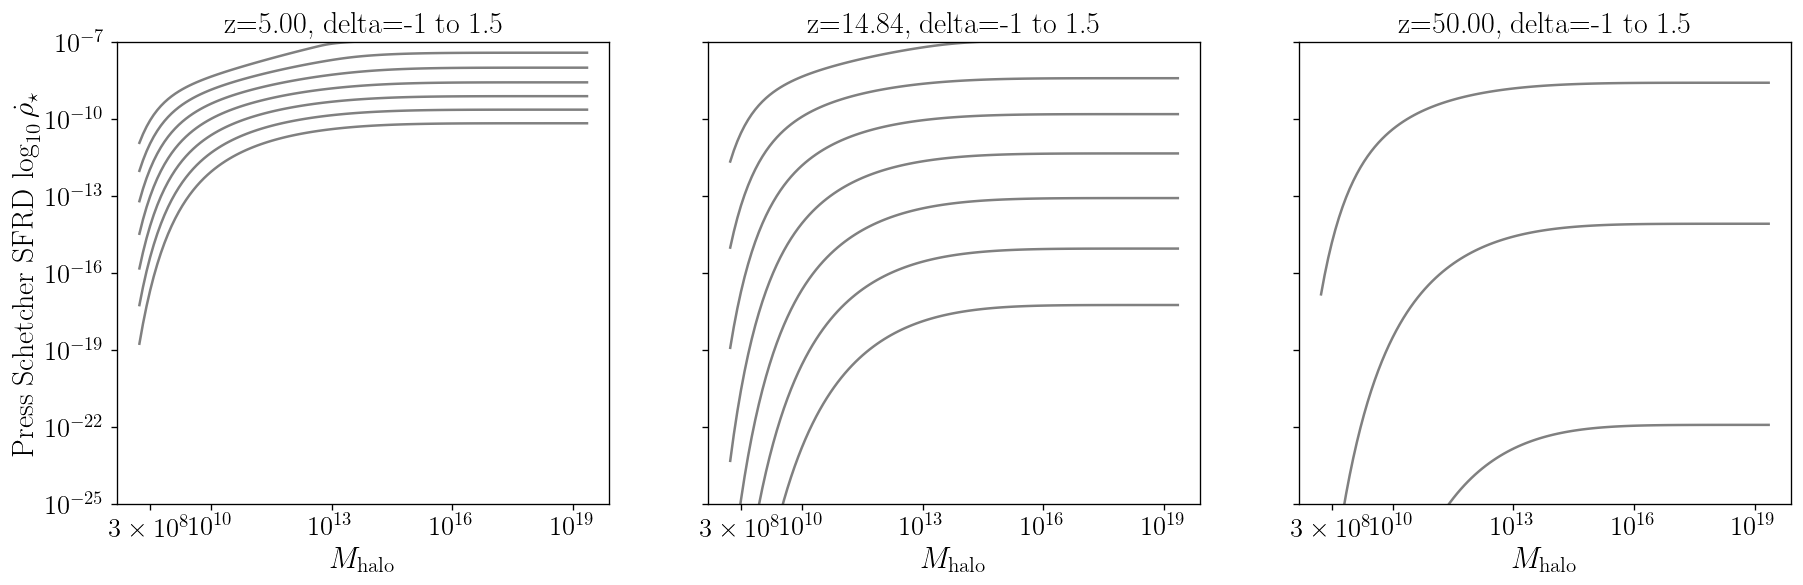

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i_p, i_z in enumerate([0, 60, -1]):
    ax = axs[i_p]
    for i in range(0, len(delta_range), 20):
        ax.plot(RtoM(r_range), ps_table[i_z, i, :], label=r"$\delta$"+f"={delta_range[i]:.2f}", color='gray')
    ax.set(xscale='log', yscale='log', ylim=(1e-25, 1e-7))
    ax.set(xlabel=r"$M_{\rm halo}$")
    if i_p == 0:
        ax.set(ylabel=r"Press Schetcher SFRD $\log_{10} \dot{\rho}_{\star}$")
    ax.set(xticks=[3e8, 1e10, 1e13, 1e16, 1e19], xticklabels=[r"$3\times10^8$", r"$10^{10}$", r"$10^{13}$", r"$10^{16}$", r"$10^{19}$"])
    ax.set(title=f'z={z_range[i_z]:.2f}, delta=-1 to 1.5');